In [24]:
import pandas as pd
from prophet import Prophet
%pip install ace_tools

In [ ]:
# Python
df = pd.read_csv('weather_prediction_dataset2.csv', delimiter=";")
df.head()

,DATE,MONTH,BASEL_temp_mean,BUDAPEST_temp_mean,DE_BILT_temp_mean,DRESDEN_temp_mean,DUSSELDORF_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MALMO_temp_mean,MONTELIMAR_temp_mean,MUENCHEN_temp_mean,OSLO_temp_mean,PERPIGNAN_temp_mean,ROMA_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,TOURS_temp_mean
0,20000101,1,2.9,-4.9,6.1,1.0,4.2,7.0,3.5,-4.8,5.6,2.9,5.5,1.7,-5.0,12.2,1.6,-15.2,-2.3,8.5
1,20000102,1,3.6,-3.6,7.3,2.5,6.5,7.9,2.3,-0.9,6.2,3.7,8.3,1.9,-0.8,9.8,4.2,-13.7,1.3,7.9
2,20000103,1,2.2,-0.8,8.4,4.2,7.7,9.4,3.5,-0.3,6.8,5.6,3.2,-0.4,1.2,8.6,3.8,-9.2,0.8,8.1
3,20000104,1,3.9,-1.0,6.4,4.4,7.8,7.0,4.8,-3.6,7.3,4.5,7.2,3.8,2.1,8.6,6.0,-5.6,3.5,8.6
4,20000105,1,6.0,0.2,4.4,1.8,5.2,6.4,2.3,-3.0,5.2,3.8,8.2,5.3,-0.7,9.2,5.0,-7.6,-0.6,8.0


In [ ]:
df_long = pd.wide_to_long(df,
                          stubnames='temp_mean',
                          i=['DATE', 'MONTH'],
                          j='Location',
                          sep='_',
                          suffix='.+').reset_index()
df_long_corrected = pd.melt(df,
                            id_vars=['DATE', 'MONTH'],
                            var_name='Location',
                            value_name='Temperature')

df_long_corrected.Location = df_long_corrected.Location.str.replace("_temp_mean","")


In [ ]:
df_long_corrected.DATE= pd.to_datetime(df_long_corrected.DATE, format='%Y%m%d')


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialisation du LabelEncoder pour la colonne 'Location'
encoder = LabelEncoder()



In [ ]:
data = df_long_corrected.dropna(axis=0)

data['ds'] = pd.to_datetime(data['DATE'])

data['y'] = data['Temperature']
data.drop(columns=["Temperature", "DATE"])
# Transformation de la colonne 'Location' en une colonne numérique unique
data['Location_encoded'] = encoder.fit_transform(data['Location'])
data

,DATE,MONTH,Location,Temperature,ds,y,Location_encoded
0,2000-01-01,1,BASEL,2.9,2000-01-01,2.9,0
1,2000-01-02,1,BASEL,3.6,2000-01-02,3.6,0
2,2000-01-03,1,BASEL,2.2,2000-01-03,2.2,0
3,2000-01-04,1,BASEL,3.9,2000-01-04,3.9,0
4,2000-01-05,1,BASEL,6.0,2000-01-05,6.0,0
...,...,...,...,...,...,...,...
65767,2009-12-28,12,TOURS,6.2,2009-12-28,6.2,17
65768,2009-12-29,12,TOURS,10.4,2009-12-29,10.4,17
65769,2009-12-30,12,TOURS,10.0,2009-12-30,10.0,17
65770,2009-12-31,12,TOURS,8.5,2009-12-31,8.5,17


In [ ]:
data['year'] = pd.to_datetime(data['ds']).dt.year
data['month'] = pd.to_datetime(data['ds']).dt.month
data['day'] = pd.to_datetime(data['ds']).dt.day

In [ ]:
encoder.get_metadata_routing()

{}

In [ ]:
data.head()

,DATE,MONTH,Location,Temperature,ds,y,Location_encoded,year,month,day
0,2000-01-01,1,BASEL,2.9,2000-01-01,2.9,0,2000,1,1
1,2000-01-02,1,BASEL,3.6,2000-01-02,3.6,0,2000,1,2
2,2000-01-03,1,BASEL,2.2,2000-01-03,2.2,0,2000,1,3
3,2000-01-04,1,BASEL,3.9,2000-01-04,3.9,0,2000,1,4
4,2000-01-05,1,BASEL,6.0,2000-01-05,6.0,0,2000,1,5


In [ ]:
# Initialisation du modèle Prophet
m = Prophet()

# Ajout d'un régresseur nommé 'Location'
# m.add_regressor('Location_encoded')
data1 = data[data.Location == "BASEL"]
m.fit(data1[["ds","y"]])

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjc4jbl16/v4qcyqt4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjc4jbl16/n12itw6f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37139', 'data', 'file=/tmp/tmpjc4jbl16/v4qcyqt4.json', 'init=/tmp/tmpjc4jbl16/n12itw6f.json', 'output', 'file=/tmp/tmpjc4jbl16/prophet_model9hujpzr5/prophet_model-20241001120932.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:09:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:09:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Python
future = m.make_future_dataframe(periods=365)
# future['Location_encoded'] = data['Location_encoded']

future.tail()

,ds
4014,2010-12-28
4015,2010-12-29
4016,2010-12-30
4017,2010-12-31
4018,2011-01-01


In [ ]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4014,2010-12-28,1.381086,-3.051095,5.864902
4015,2010-12-29,1.401465,-3.236640,5.792730
4016,2010-12-30,1.491100,-3.069618,6.309006
4017,2010-12-31,1.553056,-2.621589,6.059625
4018,2011-01-01,1.430033,-3.048607,6.070924


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


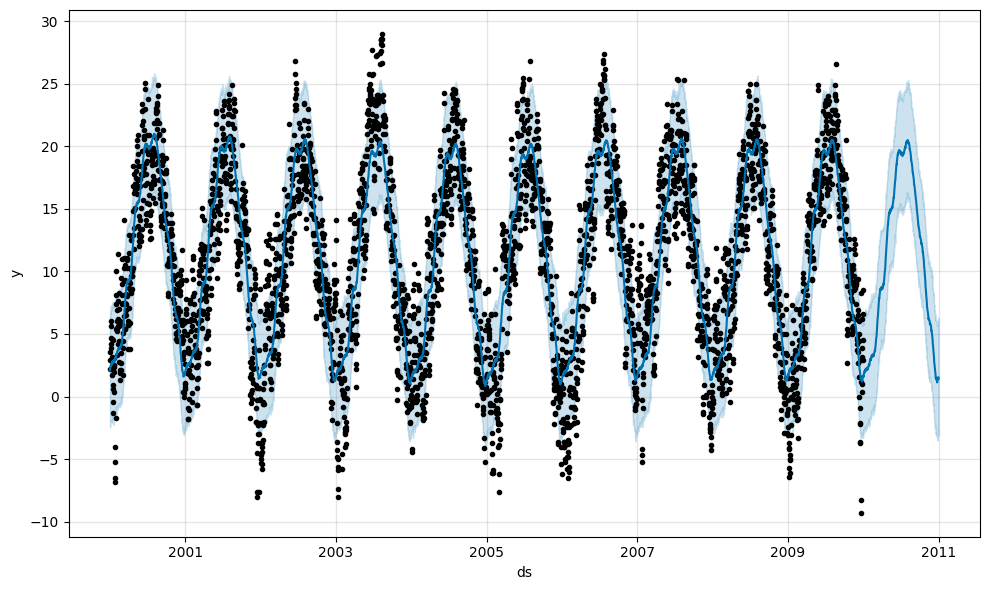

In [ ]:
# Python
fig1 = m.plot(forecast)

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

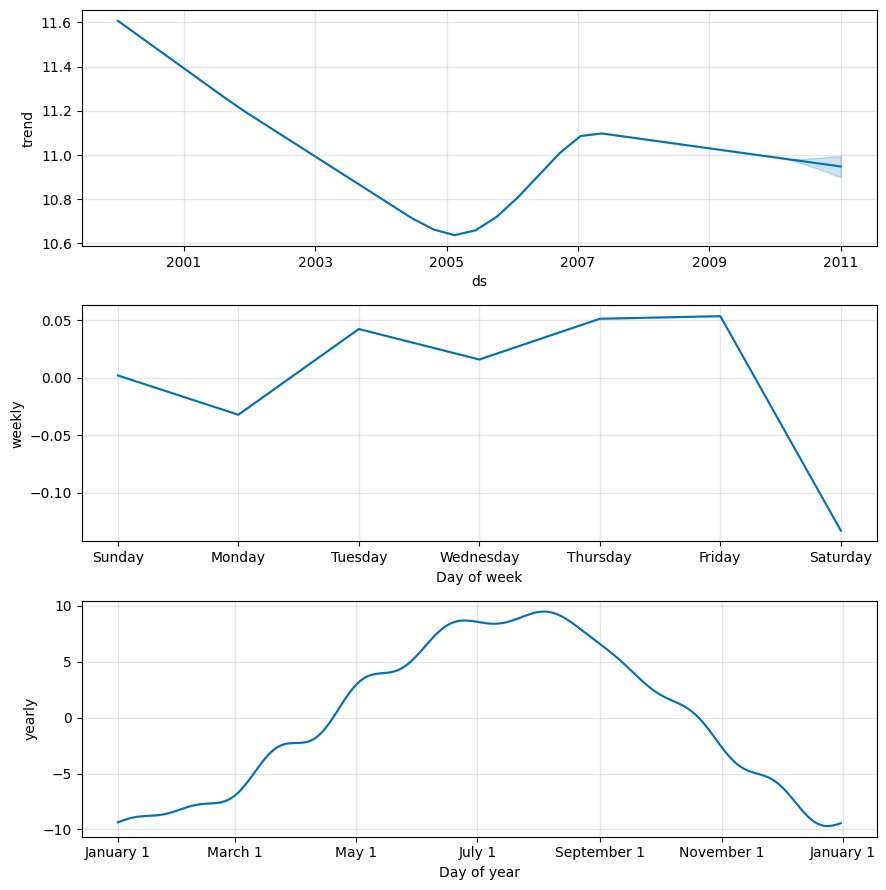

In [ ]:
fig2 = m.plot_components(forecast)



In [ ]:
# Python
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)